In [ ]:
# Import modules
from itertools import combinations

import numpy as np
from scipy import stats

import networkx as nx

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Set colors
COLORS = [
    '#00B0F0', # light blue
    '#FF0000' # red
]

## Confounding

In [ ]:
# Let's set random seed for reproducibility
np.random.seed(45)

# `b` represents our confounder
# np.random.rand() return a continous random variable ranging between zero and one
b = np.random.rand(100)

# `a` and `c` are causally independent of each other, but they are both children of `b`
a = b + .1 * np.random.rand(100)
c = b + .3 * np.random.rand(100)

In [ ]:
# take a look at the first five observations of a, b, and c
a[:5], b[:5], c[:5]

(array([1.04138646, 0.57933317, 0.33854587, 0.13468835, 0.44891165]),
 array([0.98901151, 0.54954473, 0.2814473 , 0.07728957, 0.4444695 ]),
 array([1.19485596, 0.7403161 , 0.47939113, 0.36260567, 0.71176474]))

In [ ]:
# Let's check Pearson's correlation between `a` and `c`
coef, p_val = stats.pearsonr(a, c)

print(coef)

0.962749762529751


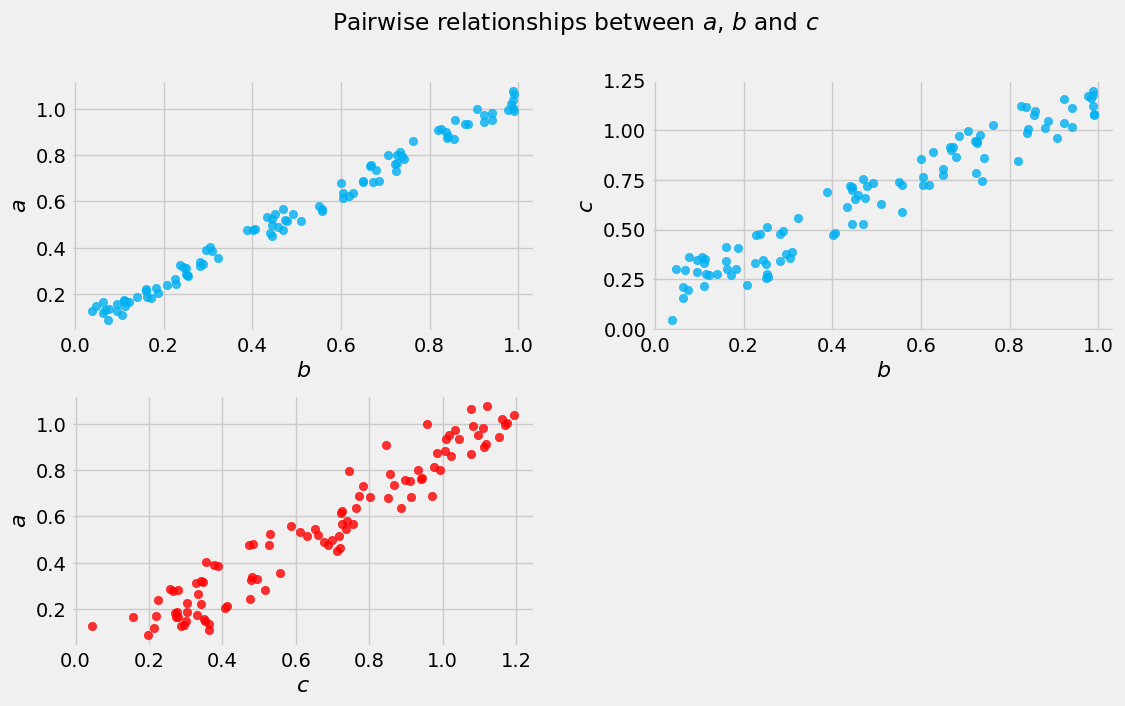

In [ ]:
# create a dictionary of variables
variables = {
    'a': a,
    'b': b,
    'c': c
}

# set figure size
plt.figure(figsize=(12, 7))

# Create scatter plots of the three pairs of variables a, b, and c
for i, (var_1, var_2) in enumerate([('b', 'a'), ('b', 'c'), ('c', 'a')]):

    color = COLORS[1]

    if 'b' in [var_1, var_2]:
        color = COLORS[0]

    plt.subplot(2, 2, i + 1)
    plt.scatter(variables[var_1], variables[var_2], alpha=.8, color=color)

    plt.xlabel(f'${var_1}$', fontsize=16)
    plt.ylabel(f'${var_2}$', fontsize=16)

plt.suptitle('Pairwise relationships between $a$, $b$ and $c$')
plt.subplots_adjust(hspace=.25, wspace=.25)
plt.show()